In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import sys
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [2]:
## Sequencial API방식1
model_seq = keras.Sequential()

model_seq.add(keras.Input(shape = (10, )))
model_seq.add(keras.layers.Dense(64, 'relu'))
model_seq.add(keras.layers.Dropout(0.2))
model_seq.add(keras.layers.Dense(32, 'relu'))
model_seq.add(keras.layers.Dense(10, 'softmax'))

model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 3,114
Trainable params: 3,114
Non-trainable params: 0
_________________________________________________________________


In [5]:
## Sequencial API방식2
model_seq2 = keras.Sequential([
    keras.Input(shape=(10, )),
    keras.layers.Dense(64,'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, 'relu'),
    keras.layers.Dense(10, 'softmax')
])

model_seq2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                704       
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 3,114
Trainable params: 3,114
Non-trainable params: 0
_________________________________________________________________


In [6]:
## functional API방식
inputs = keras.Input(shape=(10, ))
hidden1 = keras.layers.Dense(64, 'relu')(inputs)
drop_out = keras.layers.Dropout(0.2)(hidden1)
hidden2 = keras.layers.Dense(32, 'relu')(drop_out)
outputs = keras.layers.Dense(10, 'softmax')(hidden2)

model_func = keras.Model(inputs = inputs, outputs = outputs)

model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_12 (Dense)            (None, 64)                704       
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 10)                330       
                                                                 
Total params: 3,114
Trainable params: 3,114
Non-trainable params: 0
_________________________________________________________________


In [7]:
## subclassing API

class ModelSubclassing(keras.Model):
    def __init__(self, hidden1, drop_rate, hidden2, outputs):
        super(ModelSubclassing, self).__init__()
        self.hidden1 = keras.layers.Dense(hidden1,'relu')
        self.drop_out = keras.layers.Dropout(drop_rate)
        self.hidden2 = keras.layers.Dense(hidden2, 'relu')
        self.outputs = keras.layers.Dense(outputs, 'softmax')
        
    def call(self, inputs):
        x = self.hidden1(inputs)
        x = self.drop_out(x)
        x = self.hidden2(x)
        x = self.outputs(x)
        
        return x
    
model_sub = ModelSubclassing(64,0.2,32,10)
model_sub.build(input_shape=(1,10))
model_sub.summary()

Model: "model_subclassing"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            multiple                  704       
                                                                 
 dropout_5 (Dropout)         multiple                  0         
                                                                 
 dense_16 (Dense)            multiple                  2080      
                                                                 
 dense_17 (Dense)            multiple                  330       
                                                                 
Total params: 3,114
Trainable params: 3,114
Non-trainable params: 0
_________________________________________________________________


In [8]:
dataset = np.loadtxt('../pima-indians-diabetes.csv', delimiter=',')

X = dataset[:,:-1]
y = dataset[:,-1]

In [13]:
class DM(keras.Model):
    def __init__(self, hidden1, drop_rate, hidden2, outputs):
        super(DM, self).__init__()
        self.hidden1 = keras.layers.Dense(hidden1,'relu')
        self.drop_out = keras.layers.Dropout(drop_rate)
        self.hidden2 = keras.layers.Dense(hidden2,'relu')
        self.outputs = keras.layers.Dense(outputs,'sigmoid')
        
    def call(self, inputs):
        x = self.hidden1(inputs)
        x = self.drop_out(x)
        x = self.hidden2(x)
        x = self.outputs(x)
        
        return x
    
model_DM = DM(64,0.2,32,1)

In [14]:
early_stop = keras.callbacks.EarlyStopping(patience=10)
check_point = keras.callbacks.ModelCheckpoint(filepath='../model_save/DM_model_save.ckpt',
                                              save_best_only= True,
                                              save_weights_only=True)
model_DM.compile(loss = 'binary_crossentropy',
                 optimizer='adam',
                 metrics=['acc'])

In [15]:
history = model_DM.fit(X, y, validation_split=0.2, epochs=200, batch_size=64, callbacks=[early_stop, check_point])


Epoch 1/200
10/10 [==============================] - 1s 27ms/step - loss: 4.9360 - acc: 0.5065 - val_loss: 2.0671 - val_acc: 0.5455
Epoch 2/200
10/10 [==============================] - 0s 5ms/step - loss: 3.7619 - acc: 0.5033 - val_loss: 2.6941 - val_acc: 0.4740
Epoch 3/200
10/10 [==============================] - 0s 7ms/step - loss: 3.1718 - acc: 0.5375 - val_loss: 1.7688 - val_acc: 0.5065
Epoch 4/200
10/10 [==============================] - 0s 5ms/step - loss: 2.7106 - acc: 0.5065 - val_loss: 2.0248 - val_acc: 0.4481
Epoch 5/200
10/10 [==============================] - 0s 7ms/step - loss: 2.2017 - acc: 0.5863 - val_loss: 1.1860 - val_acc: 0.5065
Epoch 6/200
10/10 [==============================] - 0s 4ms/step - loss: 1.8584 - acc: 0.5896 - val_loss: 1.3802 - val_acc: 0.4805
Epoch 7/200
10/10 [==============================] - 0s 5ms/step - loss: 1.6638 - acc: 0.5749 - val_loss: 1.4271 - val_acc: 0.4870
Epoch 8/200
10/10 [==============================] - 0s 6ms/step - loss: 1.4046 - 

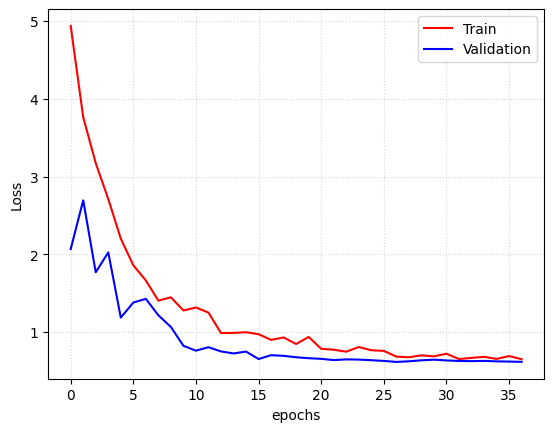

In [16]:
plt.plot(history.history['loss'], c = 'r', label = 'Train')
plt.plot(history.history['val_loss'], c = 'b', label = 'Validation')

plt.legend()
plt.grid(alpha = 0.5, linestyle = ':')
plt.xlabel('epochs')
plt.ylabel('Loss')

plt.show()